## Setup

In [77]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os 
import shutil
import dplython

In [123]:
cab_data = pd.read_csv('Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
city = pd.read_csv('City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
customer_id = pd.read_csv('Customer_ID.csv')
customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
transaction_id = pd.read_csv('Transaction_ID.csv')
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


Idea Dump:
* Do certain age groups use cash or card predominately?
* DO certain income groups use cash or card predominately??
* Do certain income groups use cabs more frequently?
* Whats the minimum KM Travelled that allows a profit?
* What city has the greatest profit?

## Data Cleaning

### Cab Data

In [7]:
cab_data.isnull().values.any()

False

In [13]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [15]:
numeric_cols = cab_data.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['Transaction ID', 'Date of Travel', 'KM Travelled', 'Price Charged',
       'Cost of Trip'],
      dtype='object')


In [16]:
cab_data.kurt(numeric_only=True)

Transaction ID   -1.198925
Date of Travel   -1.137363
KM Travelled     -1.126875
Price Charged     0.747635
Cost of Trip     -1.012233
dtype: float64

<AxesSubplot:>

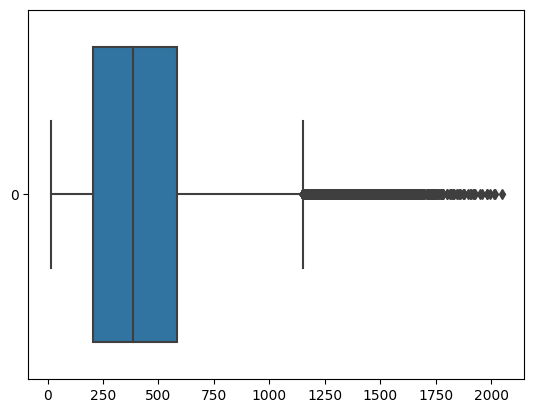

In [28]:
sns.boxplot(data=cab_data['Price Charged'], orient="h")

<AxesSubplot:>

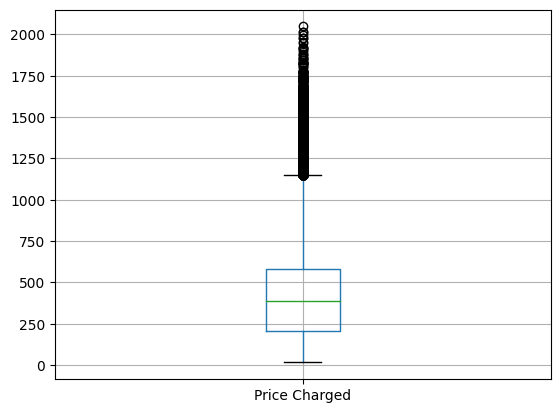

In [22]:
cab_data.boxplot(column=['Price Charged'])


<AxesSubplot:>

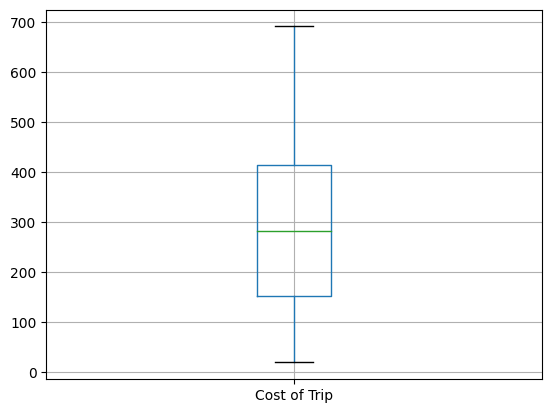

In [23]:
cab_data.boxplot(column=['Cost of Trip'])


<AxesSubplot:>

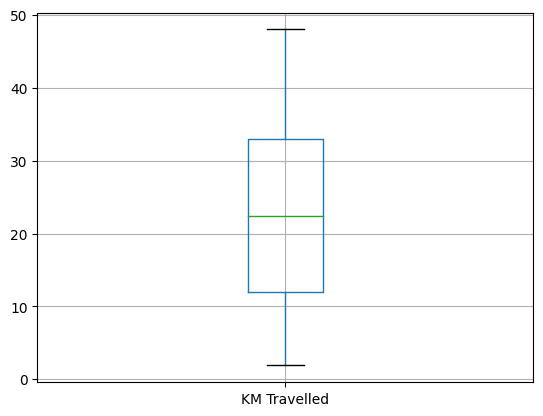

In [24]:
cab_data.boxplot(column=['KM Travelled'])

In [25]:
num_rows = len(cab_data)

for col in cab_data.columns:
    cnts = cab_data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [26]:
cab_data[cab_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [41]:
cab_data_cleaned=cab_data.copy().drop(['Transaction ID'], axis=1)

In [42]:
Start =pd.Timestamp('1899-12-30')
cab_data_cleaned["Date of Travel"] = pd.to_datetime(cab_data_cleaned["Date of Travel"], unit="D", origin = Start)

In [43]:
cab_data_cleaned.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [51]:
cab_data_cleaned['Profit'] = cab_data_cleaned['Price Charged'].sub(cab_data_cleaned['Cost of Trip'], axis = 0)
cab_data_cleaned.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [69]:
cab_data_cleaned['DOW'] = cab_data_cleaned['Date of Travel'].dt.day_name()

In [70]:
pink_cab = cab_data_cleaned.loc[cab_data_cleaned['Company']== 'Pink Cab']
pink_cab.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,DOW
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,Friday
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,Wednesday
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,Saturday
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,Thursday
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,Sunday


In [71]:
yellow_cab = cab_data_cleaned.loc[cab_data_cleaned['Company']== 'Yellow Cab']
yellow_cab.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,DOW
233,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,Saturday
234,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768,Saturday
235,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,Sunday
236,2016-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600,Wednesday
237,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908,Thursday


In [72]:
pink_cab.describe()

,KM Travelled,Price Charged,Cost of Trip,Profit
count,84711.000000,84711.000000,84711.000000,84711.000000
mean,22.559917,310.800856,248.148682,62.652174
std,12.231092,181.995661,135.403345,77.590378
min,1.900000,15.600000,19.000000,-220.060000
25%,12.000000,159.970000,131.868000,11.206000
50%,22.440000,298.060000,246.330000,41.500000
75%,32.960000,441.505000,360.180000,93.965000
max,48.000000,1623.480000,576.000000,1119.480000


In [64]:
yellow_cab.describe()

,KM Travelled,Price Charged,Cost of Trip,Profit
count,274681.000000,274681.000000,274681.000000,274681.000000
mean,22.569517,458.181990,297.922004,160.259986
std,12.234298,288.386166,162.548986,171.823833
min,1.900000,20.730000,22.800000,-176.930800
25%,11.990000,226.680000,158.400000,37.180000
50%,22.440000,425.060000,295.596000,102.000000
75%,32.960000,633.880000,432.432000,228.670400
max,48.000000,2048.030000,691.200000,1463.966000


<AxesSubplot:>

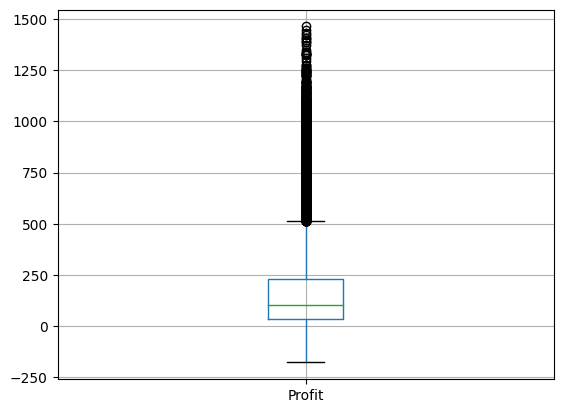

In [66]:
yellow_cab.boxplot(column=['Profit'])

<AxesSubplot:xlabel='DOW', ylabel='Profit'>

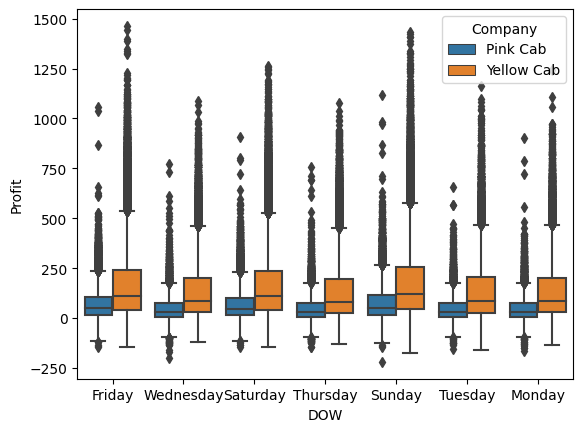

In [76]:
sns.boxplot(x="DOW", y="Profit", hue="Company", data=cab_data_cleaned)

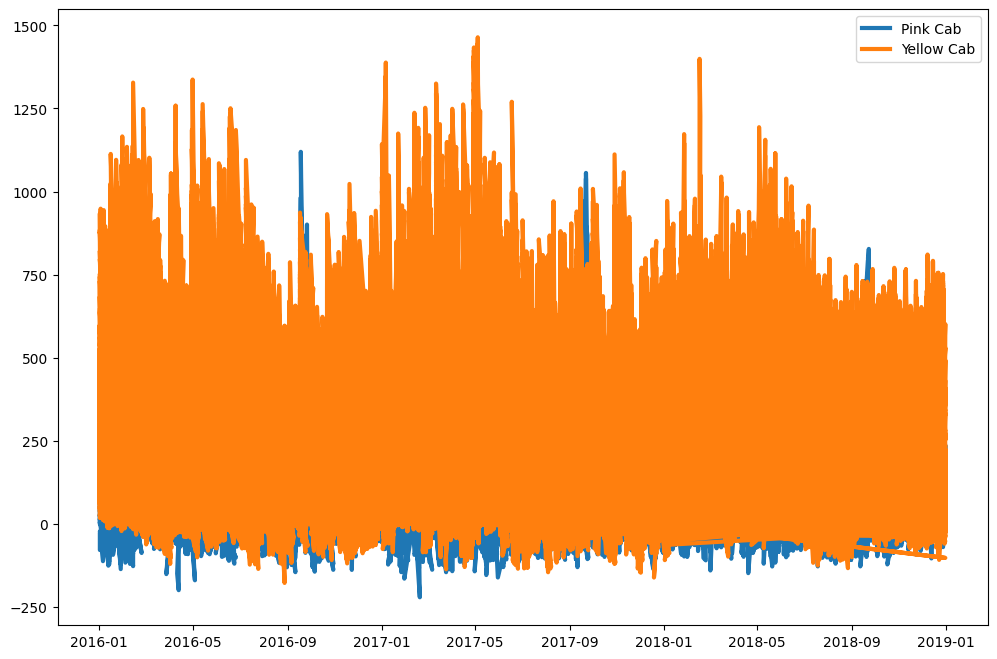

In [63]:
fig = plt.figure(figsize=(12, 8))
plt.plot(pink_cab['Date of Travel'], pink_cab['Profit'], label='Pink Cab', 
         linewidth=3)
plt.plot(yellow_cab['Date of Travel'], yellow_cab['Profit'], label='Yellow Cab', 
         linewidth=3)
plt.legend()
# plt.tight_layout()
plt.show()

<AxesSubplot:>

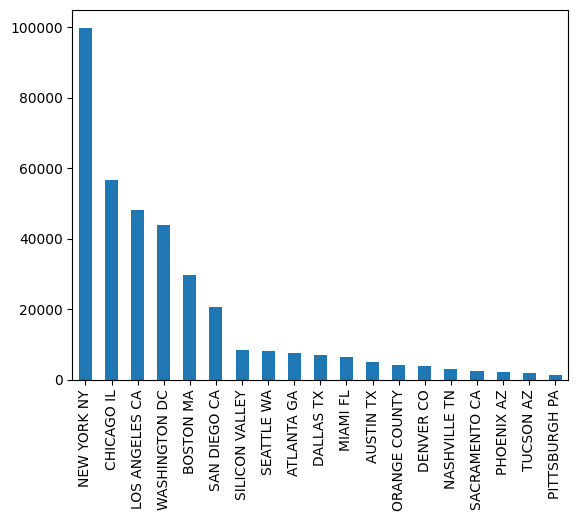

In [49]:
cab_data_cleaned['City'].value_counts().plot(kind='bar')

<AxesSubplot:>

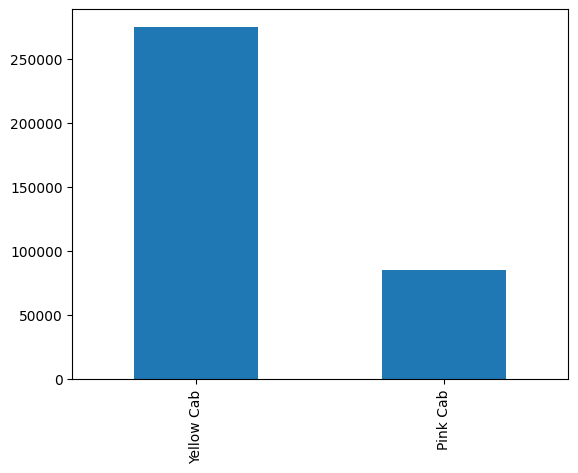

In [50]:
cab_data_cleaned['Company'].value_counts().plot(kind='bar')

In [48]:
cab_data_cleaned['City'].unique

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [93]:
cities = cab_data_cleaned['City'].value_counts().rename_axis('unique_values').reset_index(name='counts')
# .values.tolist()

unique_values    NEW YORK NY
counts                 99885
Name: 0, dtype: object

In [100]:
cities.head()

,unique_values,counts
0,NEW YORK NY,99885
1,CHICAGO IL,56625
2,LOS ANGELES CA,48033
3,WASHINGTON DC,43737
4,BOSTON MA,29692


In [ ]:
for column in cities['']

In [99]:
cities['unique_values'].str.rsplit(n=2, expand=True)

,0,1,2
0,NEW,YORK,NY
1,CHICAGO,IL,None
2,LOS,ANGELES,CA
3,WASHINGTON,DC,None
4,BOSTON,MA,None
5,SAN,DIEGO,CA
6,SILICON,VALLEY,None
7,SEATTLE,WA,None
8,ATLANTA,GA,None
9,DALLAS,TX,None


In [90]:
cities

[['NEW YORK NY', 99885],
 ['CHICAGO IL', 56625],
 ['LOS ANGELES CA', 48033],
 ['WASHINGTON DC', 43737],
 ['BOSTON MA', 29692],
 ['SAN DIEGO CA', 20488],
 ['SILICON VALLEY', 8519],
 ['SEATTLE WA', 7997],
 ['ATLANTA GA', 7557],
 ['DALLAS TX', 7017],
 ['MIAMI FL', 6454],
 ['AUSTIN TX', 4896],
 ['ORANGE COUNTY', 3982],
 ['DENVER CO', 3825],
 ['NASHVILLE TN', 3010],
 ['SACRAMENTO CA', 2367],
 ['PHOENIX AZ', 2064],
 ['TUCSON AZ', 1931],
 ['PITTSBURGH PA', 1313]]

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = [["Chicago",10],
          ["Boston",10],
          ["New York",5],
          ["San Francisco",25]]
scale = 5

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
c:\Users\dmusa\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\basemap\__init__.py:2225: DeprecationWarning: invalid escape sequence '\*'
  """


OSError: cannot locate st99_d00.shp

In [46]:
cab_data_cleaned.describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


<AxesSubplot:>

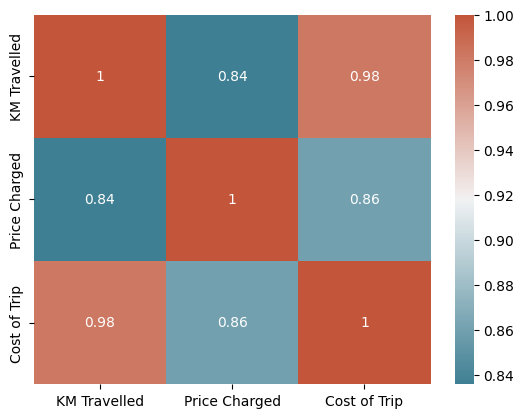

In [44]:
cab_corr = cab_data_cleaned.corr()
sns.heatmap(cab_corr, xticklabels=cab_corr.columns, yticklabels=cab_corr.columns,
 annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

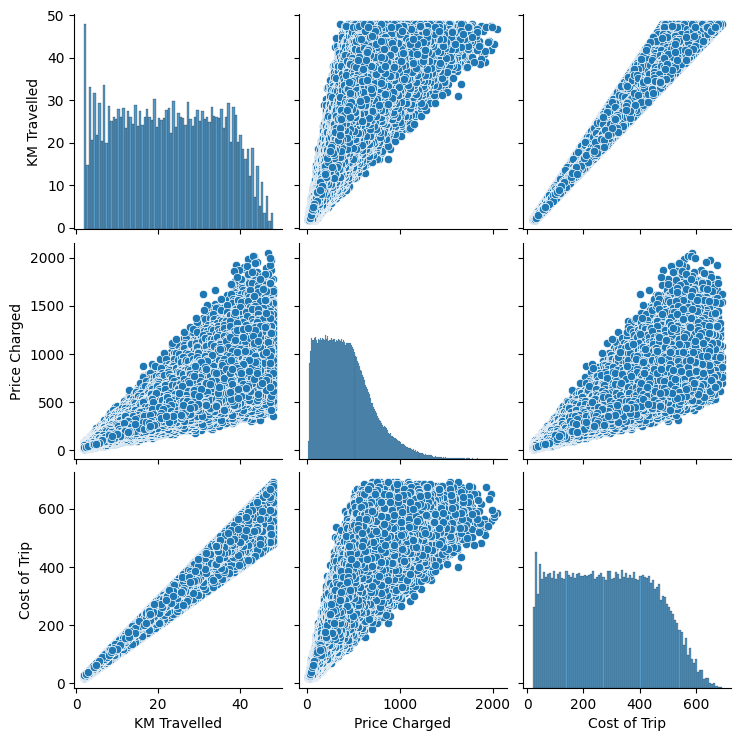

In [45]:
sns.pairplot(cab_data_cleaned)

### City

In [8]:
city.isnull().values.any()

False

In [14]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [101]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer ID

In [9]:
customer_id.isnull().values.any()

False

In [102]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


<AxesSubplot:>

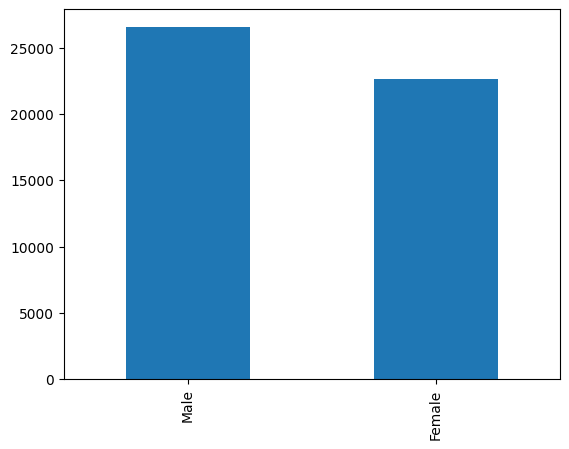

In [110]:
customer_id['Gender'].value_counts().plot(kind='bar')

In [116]:
bins = [18, 35, 55, 65]
labels = ['Young Adult', 'Middle Aged Adult', 'Older Aged Adult']
customer_id['Age Group'] = pd.cut(customer_id['Age'], bins=bins, labels=labels, right=False)
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month),Age Group
0,29290,Male,28,10813,Young Adult
1,27703,Male,27,9237,Young Adult
2,28712,Male,53,11242,Middle Aged Adult
3,28020,Male,23,23327,Young Adult
4,27182,Male,33,8536,Young Adult


<AxesSubplot:>

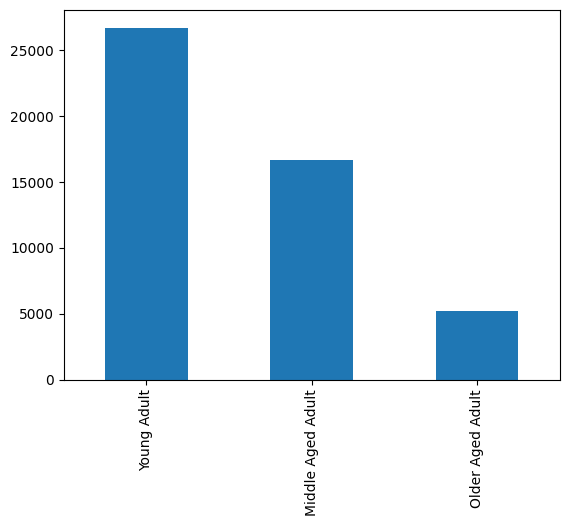

In [119]:
customer_id['Age Group'].value_counts().plot(kind='bar')

### Transaction ID

In [10]:
transaction_id.isnull().values.any()

False

In [103]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


<AxesSubplot:>

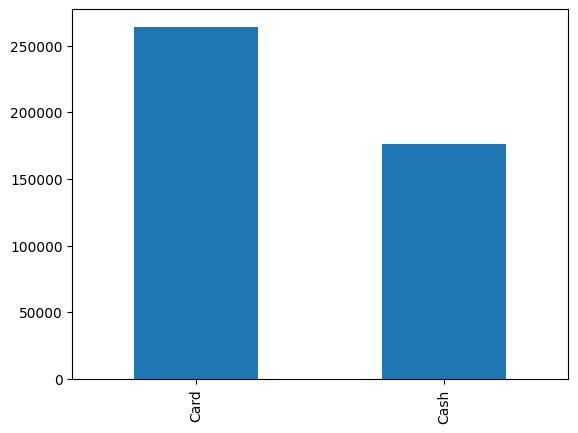

In [108]:
transaction_id['Payment_Mode'].value_counts().plot(kind='bar')

In [106]:
customer = pd.merge(transaction_id, customer_id, on ='Customer ID')
customer.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


### Master Data

In [224]:
master_data = cab_data.merge(transaction_id, on= 'Transaction ID').merge(customer_id, on ='Customer ID').merge(city, on = 'City')
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885","24,701"


In [225]:
Start =pd.Timestamp('1899-12-30')
master_data["Date of Travel"] = pd.to_datetime(master_data["Date of Travel"], unit="D", origin = Start)
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885","24,701"


In [226]:
master_data['Profit'] = master_data['Price Charged'].sub(master_data['Cost of Trip'], axis = 0)
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885","24,701",281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",253.9808


In [227]:
master_data['DOW'] = master_data['Date of Travel'].dt.day_name()
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users,Profit,DOW
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",57.3150,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885","24,701",281.2772,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",194.6480,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",23.6660,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",253.9808,Saturday


In [228]:
pink_cab_master = master_data.loc[master_data['Company']== 'Pink Cab']
pink_cab_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users,Profit,DOW
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",57.315,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",23.666,Wednesday
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",25.096,Saturday
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,Middle Aged Adult,"814,885","24,701",27.568,Saturday
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,Young Adult,"814,885","24,701",25.798,Thursday


In [229]:
yellow_cab_master = master_data.loc[master_data['Company']== 'Yellow Cab']
yellow_cab_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Population,Users,Profit,DOW
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885","24,701",281.2772,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885","24,701",194.6480,Friday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885","24,701",253.9808,Saturday
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,Young Adult,"814,885","24,701",50.8912,Friday
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,Middle Aged Adult,"814,885","24,701",210.0920,Wednesday


In [232]:
master_data['Users']= master_data['Users'].str.replace("", "")
master_data['Users']= pd.to_numeric(master_data['Users'])
master_data.head()

AttributeError: Can only use .str accessor with string values!

[Text(0, 0, 'ATLANTA GA'),
 Text(1, 0, 'AUSTIN TX'),
 Text(2, 0, 'BOSTON MA'),
 Text(3, 0, 'CHICAGO IL'),
 Text(4, 0, 'DALLAS TX'),
 Text(5, 0, 'DENVER CO'),
 Text(6, 0, 'LOS ANGELES CA'),
 Text(7, 0, 'MIAMI FL'),
 Text(8, 0, 'NASHVILLE TN'),
 Text(9, 0, 'NEW YORK NY'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX AZ'),
 Text(12, 0, 'PITTSBURGH PA'),
 Text(13, 0, 'SACRAMENTO CA'),
 Text(14, 0, 'SAN DIEGO CA'),
 Text(15, 0, 'SEATTLE WA'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON AZ'),
 Text(18, 0, 'WASHINGTON DC')]

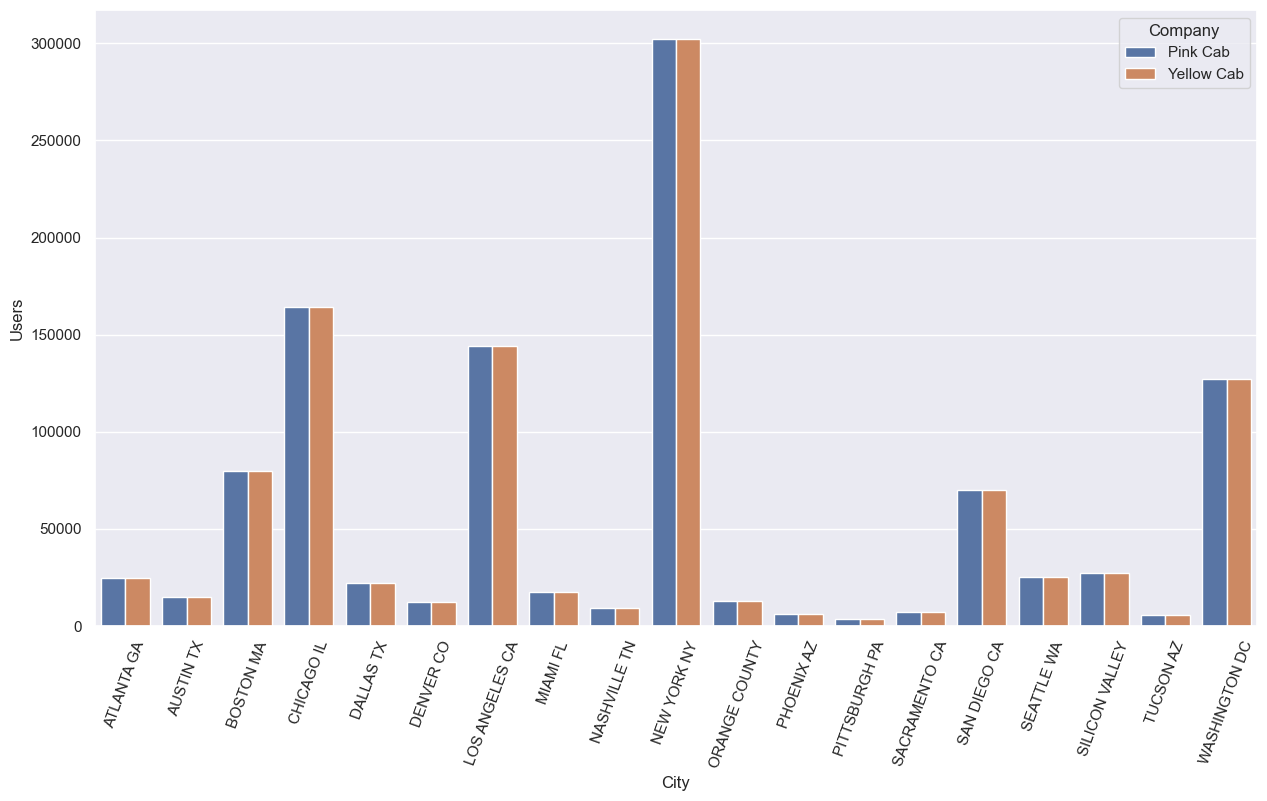

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.barplot(x="City", y="Users", hue="Company", data=master_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)

[Text(0, 0, 'ATLANTA GA'),
 Text(1, 0, 'AUSTIN TX'),
 Text(2, 0, 'BOSTON MA'),
 Text(3, 0, 'CHICAGO IL'),
 Text(4, 0, 'DALLAS TX'),
 Text(5, 0, 'DENVER CO'),
 Text(6, 0, 'LOS ANGELES CA'),
 Text(7, 0, 'MIAMI FL'),
 Text(8, 0, 'NASHVILLE TN'),
 Text(9, 0, 'NEW YORK NY'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX AZ'),
 Text(12, 0, 'PITTSBURGH PA'),
 Text(13, 0, 'SACRAMENTO CA'),
 Text(14, 0, 'SAN DIEGO CA'),
 Text(15, 0, 'SEATTLE WA'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON AZ'),
 Text(18, 0, 'WASHINGTON DC')]

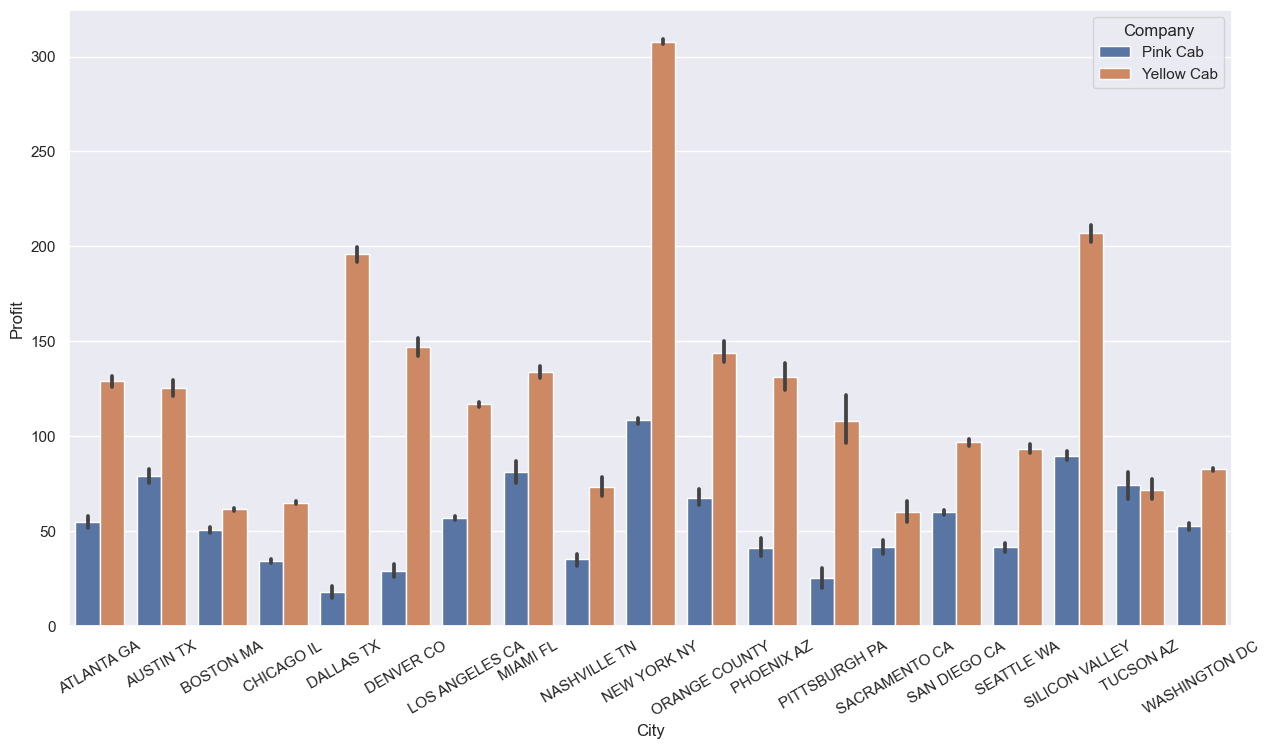

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.barplot(x="City", y="Profit", hue="Company", data=master_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'ATLANTA GA'),
 Text(1, 0, 'AUSTIN TX'),
 Text(2, 0, 'BOSTON MA'),
 Text(3, 0, 'CHICAGO IL'),
 Text(4, 0, 'DALLAS TX'),
 Text(5, 0, 'DENVER CO'),
 Text(6, 0, 'LOS ANGELES CA'),
 Text(7, 0, 'MIAMI FL'),
 Text(8, 0, 'NASHVILLE TN'),
 Text(9, 0, 'NEW YORK NY'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX AZ'),
 Text(12, 0, 'PITTSBURGH PA'),
 Text(13, 0, 'SACRAMENTO CA'),
 Text(14, 0, 'SAN DIEGO CA'),
 Text(15, 0, 'SEATTLE WA'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON AZ'),
 Text(18, 0, 'WASHINGTON DC')]

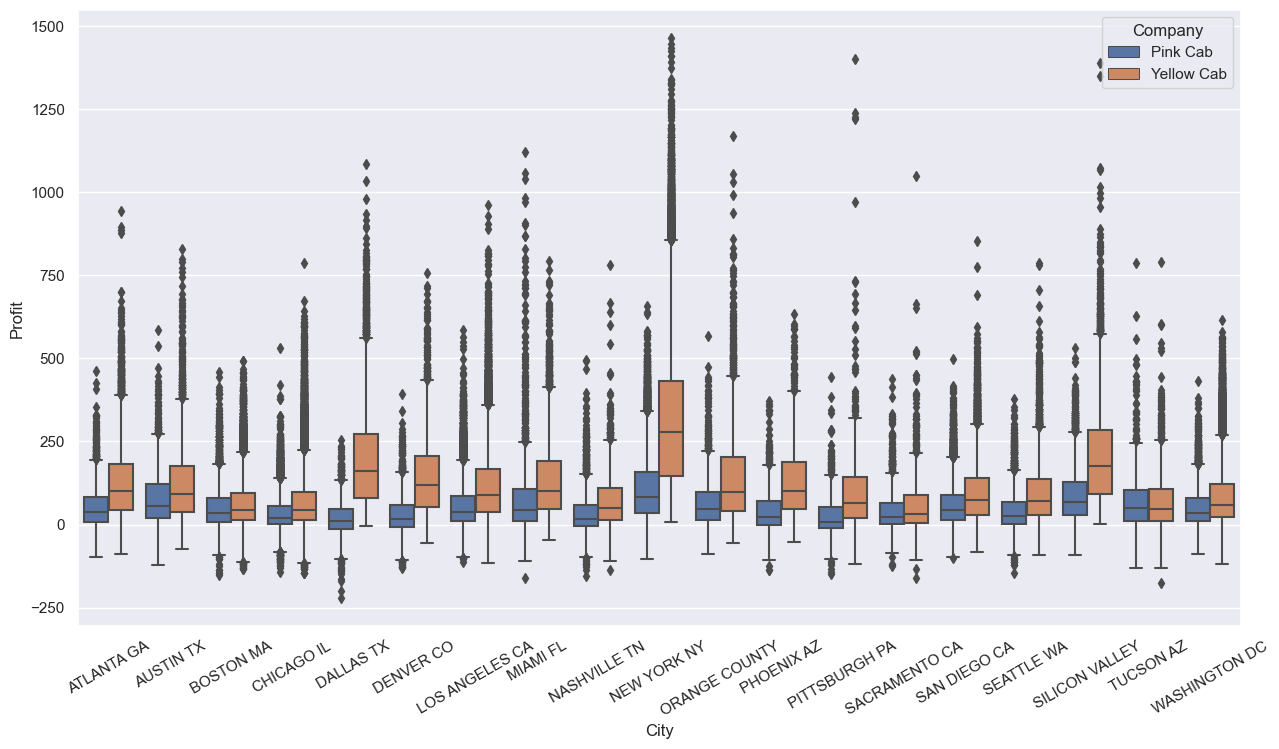

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.boxplot(x="City", y="Profit", hue="Company", data=master_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [233]:
master_data=master_data.rename(columns={'Income (USD/Month)': 'Income'})
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income,Age Group,Population,Users,Profit,DOW
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885",24701,57.3150,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885",24701,281.2772,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885",24701,194.6480,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885",24701,23.6660,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885",24701,253.9808,Saturday


In [ ]:
master_data["Income"].max()

35000

In [234]:
bins = [0, 4350, 13050, 35000]
labels = ['Low Income', 'Middle Income', 'Upper Income']
master_data["Income Group"] = pd.cut(master_data["Income"], bins=bins, labels=labels, right=False)
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income,Age Group,Population,Users,Profit,DOW,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885",24701,57.3150,Friday,Middle Income
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885",24701,281.2772,Saturday,Middle Income
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885",24701,194.6480,Friday,Middle Income
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885",24701,23.6660,Wednesday,Middle Income
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885",24701,253.9808,Saturday,Middle Income


In [235]:
master_data['Income Group'].value_counts()

Upper Income     203314
Middle Income    122384
Low Income        33693
Name: Income Group, dtype: int64

<AxesSubplot:>

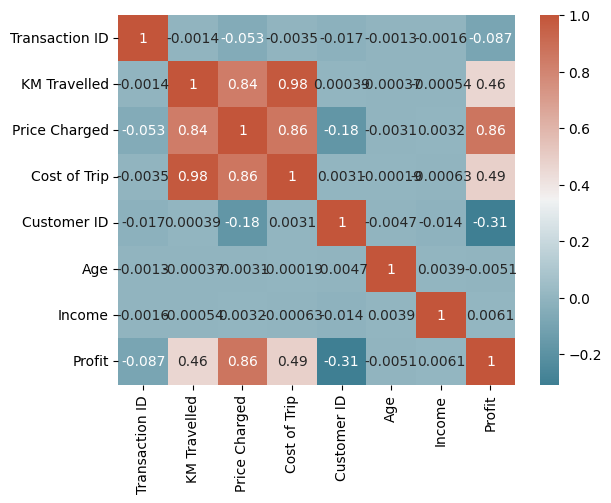

In [ ]:
corr = master_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
master_data.shape

(359392, 18)

<AxesSubplot:xlabel='Cost of Trip', ylabel='Count'>

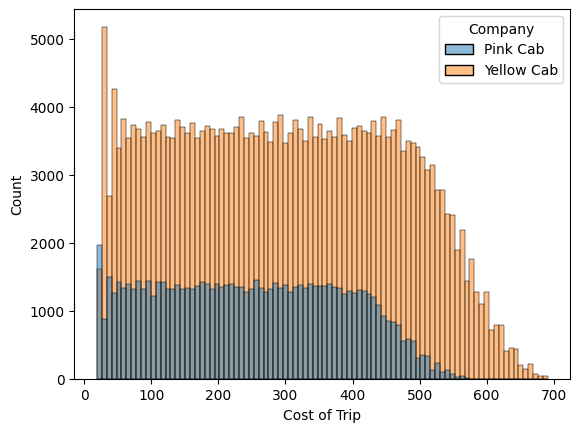

In [ ]:
sns.histplot(data=master_data, x ="Cost of Trip", hue="Company")

<AxesSubplot:xlabel='Price Charged', ylabel='Count'>

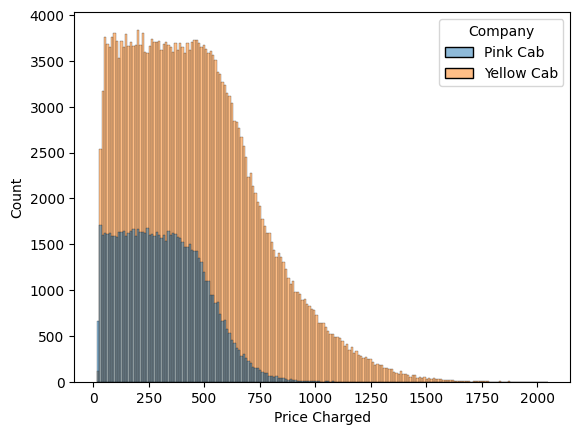

In [ ]:
sns.histplot(data=master_data, x ="Price Charged", hue="Company")

<AxesSubplot:xlabel='KM Travelled', ylabel='Count'>

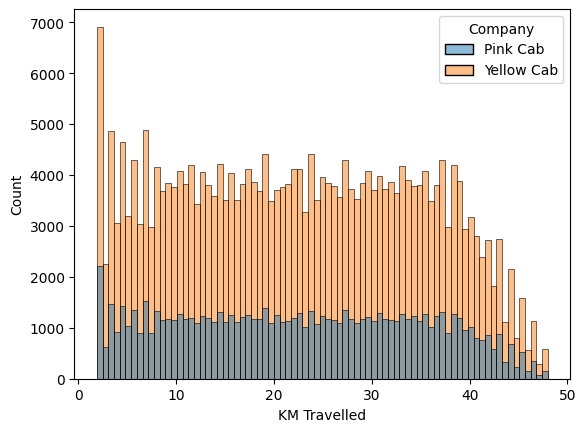

In [ ]:
sns.histplot(data=master_data, x ="KM Travelled" ,hue="Company")

<AxesSubplot:xlabel='Age', ylabel='Count'>

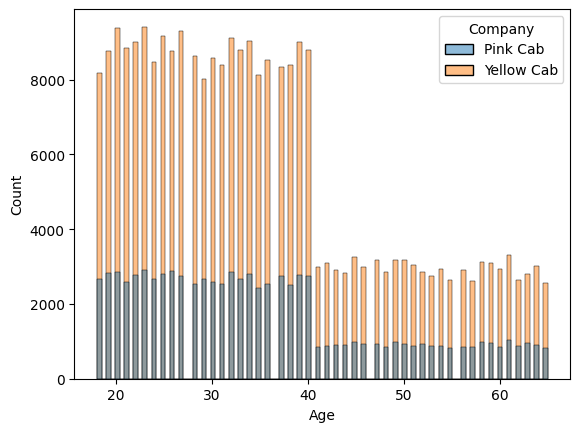

In [ ]:
sns.histplot(data=master_data, x ="Age" ,hue="Company")

<AxesSubplot:xlabel='Income', ylabel='Count'>

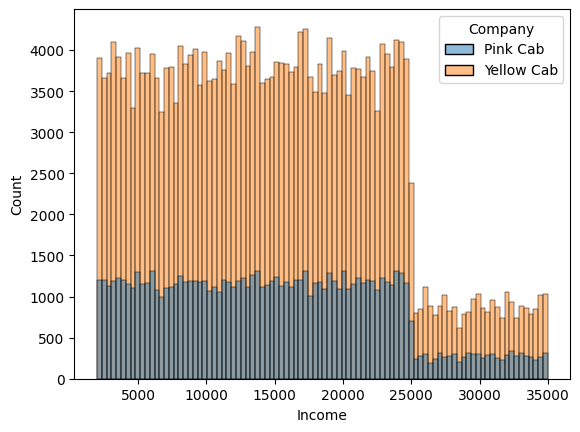

In [ ]:
sns.histplot(data=master_data, x ="Income" ,hue="Company")

<AxesSubplot:xlabel='Profit', ylabel='Count'>

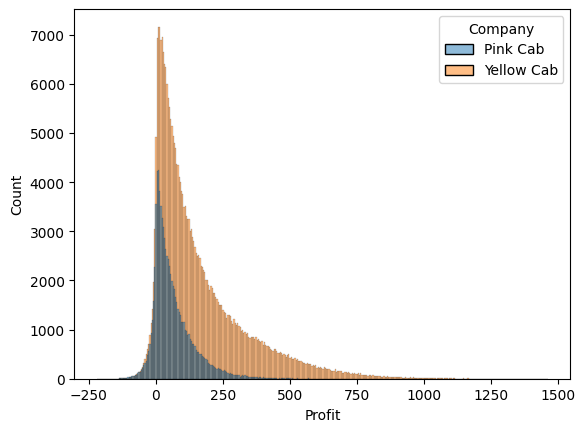

In [ ]:
sns.histplot(data=master_data, x ="Profit" , hue="Company")

In [ ]:
master_data['Customer ID'].max()

60000

In [ ]:
master_data[master_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income,Age Group,Population,Users,Profit,DOW,Income Group


In [ ]:
master_data.groupby(['Customer ID', 'Gender', 'Age', 'Income', 'Age Group', 'Income Group']).apply(', '.join).reset_index()

,Customer ID,Gender,Age,Income,Age Group,Income Group,0
0,1,Male,36,16359,Middle Aged Adult,Upper Income,"Transaction ID, Date of Travel, Company, City,..."
1,2,Male,31,12069,Young Adult,Middle Income,"Transaction ID, Date of Travel, Company, City,..."
2,3,Female,27,12968,Young Adult,Middle Income,"Transaction ID, Date of Travel, Company, City,..."
3,4,Male,33,13803,Young Adult,Upper Income,"Transaction ID, Date of Travel, Company, City,..."
4,5,Male,24,9965,Young Adult,Middle Income,"Transaction ID, Date of Travel, Company, City,..."
...,...,...,...,...,...,...,...
45675,59996,Male,51,16634,Middle Aged Adult,Upper Income,"Transaction ID, Date of Travel, Company, City,..."
45676,59997,Male,63,22352,Older Aged Adult,Upper Income,"Transaction ID, Date of Travel, Company, City,..."
45677,59998,Female,23,5678,Young Adult,Middle Income,"Transaction ID, Date of Travel, Company, City,..."
45678,59999,Male,38,24577,Middle Aged Adult,Upper Income,"Transaction ID, Date of Travel, Company, City,..."


In [ ]:
# aggregate =
master_data.groupby(master_data['Customer ID'])

In [ ]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income,Age Group,Population,Users,Profit,DOW,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885",24701,57.3150,Friday,Middle Income
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885",24701,281.2772,Saturday,Middle Income
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885",24701,194.6480,Friday,Middle Income
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885",24701,23.6660,Wednesday,Middle Income
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885",24701,253.9808,Saturday,Middle Income


In [236]:
master_data[master_data.columns[1:]]

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income,Age Group,Population,Users,Profit,DOW,Income Group
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,Young Adult,"814,885",24701,57.3150,Friday,Middle Income
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,Young Adult,"814,885",24701,281.2772,Saturday,Middle Income
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,Young Adult,"814,885",24701,194.6480,Friday,Middle Income
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,Young Adult,"814,885",24701,23.6660,Wednesday,Middle Income
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,Young Adult,"814,885",24701,253.9808,Saturday,Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,Young Adult,"418,859",127001,143.6180,Saturday,Middle Income
359388,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,Young Adult,"418,859",127001,23.0464,Friday,Middle Income
359389,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,Young Adult,"418,859",127001,-5.8540,Friday,Middle Income
359390,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,Young Adult,"418,859",127001,-6.0900,Thursday,Middle Income


### Recommendation

It's recommended to invest in Yellow Cab since they have better profit and more users.